In [2]:
import sys
sys.path.insert(0, '../src')
import logging
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import os
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from data import make_dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from models import train_model,predict_model

# Load CSV files

In [3]:
ds = pd.read_csv('../data/raw/dataset_00_with_header.csv')

View statistical details of features in the dataset

In [4]:
print(ds.describe())
# The scale of data in each feature show large variance

               x001          x002          x003          x004          x005  \
count  1.000000e+05  78568.000000  78568.000000  78576.000000  93890.000000   
mean   1.218244e+06    125.711727     25.541238     65.393212    178.238545   
std    2.728977e+05    115.785117     49.028751     63.592317    124.520628   
min    5.170000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.743635e+05     32.000000      3.000000     19.000000     87.000000   
50%    1.235926e+06    100.000000      8.000000     48.000000    150.000000   
75%    1.445326e+06    180.000000     24.000000     92.000000    246.000000   
max    1.677197e+06    718.000000    704.000000    704.000000    827.000000   

                x006           x007           x008           x009  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.314040       0.694000       1.388220       1.192980   
std         0.464135       1.379378       2.282805       2.031083   
min         

# Preprocessing data

In [9]:
di = make_dataset.data_imputation(ds)
dn=make_dataset.data_normalisation(di)

           x001      x005  x006      x007      x008      x009      x010  \
0      0.918371  0.009674   1.0  0.000000  0.009259  0.000000  0.000000   
1      0.490582  0.004837   0.0  0.045455  0.018519  0.000000  0.000000   
2      0.649664  0.116082   1.0  0.000000  0.000000  0.000000  0.030303   
3      0.684234  0.311971   0.0  0.000000  0.000000  0.012346  0.060606   
4      0.733087  0.041112   1.0  0.000000  0.000000  0.000000  0.090909   
5      0.770430  0.152358   0.0  0.000000  0.000000  0.000000  0.000000   
6      0.546002  0.064087   0.0  0.000000  0.009259  0.037037  0.030303   
7      0.932629  0.129383   0.0  0.000000  0.018519  0.037037  0.090909   
8      0.549360  0.088271   0.0  0.045455  0.037037  0.012346  0.030303   
9      0.815309  0.216445   0.0  0.000000  0.000000  0.049383  0.030303   
10     0.761922  0.385732   1.0  0.000000  0.000000  0.000000  0.000000   
11     0.993658  0.010883   0.0  0.045455  0.027778  0.000000  0.000000   
12     0.549119  0.276904

,x001,x005,x006,x007,x008,x009,x010,x011,x012,x013,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,0.651477,0.009627,0.693147,0.000000,0.009217,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561469
1,0.399167,0.004825,0.000000,0.044452,0.018349,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001196,0.000342,0.000000,0.001929,0.693147,0.693147,0.693147,0.000000,0.000000,0.391139
2,0.500571,0.109825,0.693147,0.000000,0.000000,0.000000,0.029853,0.065958,0.087011,0.023530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414699
3,0.521311,0.271531,0.000000,0.000000,0.000000,0.012270,0.058841,0.022473,0.022473,0.023530,...,0.013195,0.003791,0.015402,0.000000,0.693147,0.693147,0.693147,0.000000,0.000000,0.350160
4,0.549904,0.040290,0.693147,0.000000,0.000000,0.000000,0.087011,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310155
5,0.571223,0.141810,0.000000,0.000000,0.000000,0.000000,0.000000,0.022473,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352771
6,0.435672,0.062117,0.000000,0.000000,0.009217,0.036368,0.029853,0.087011,0.000000,0.000000,...,0.005739,0.001645,0.000000,0.009239,0.693147,0.693147,0.693147,0.000000,0.000000,0.382317
7,0.658881,0.121672,0.000000,0.000000,0.018349,0.036368,0.087011,0.044452,0.127833,0.023530,...,0.012137,0.003486,0.000000,0.019500,0.693147,0.693147,0.693147,0.000000,0.065414,0.450804
8,0.437842,0.084590,0.000000,0.044452,0.036368,0.012270,0.029853,0.000000,0.022473,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.503751
9,0.596256,0.195933,0.000000,0.000000,0.000000,0.048202,0.029853,0.022473,0.000000,0.046520,...,0.007801,0.002237,0.003894,0.007219,0.693147,0.693147,0.693147,0.000000,0.000000,0.429298


In [152]:
di[0:10]

,x001,x005,x006,x007,x008,x009,x010,x011,x012,x013,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706.0
1,823066.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,5206.0,5206.0,0.0,5206.0,1.0,1.0,1.0,0.0,0.0,558.0
2,1089795.0,96.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,577.0
3,1147758.0,258.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,57762.0,57762.0,57762.0,0.0,1.0,1.0,1.0,0.0,0.0,526.0
4,1229670.0,34.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0
5,1292282.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,528.0
6,915987.0,53.0,0.0,0.0,1.0,3.0,1.0,4.0,0.0,0.0,...,25031.0,25031.0,0.0,25031.0,1.0,1.0,1.0,0.0,0.0,551.0
7,1564237.0,107.0,0.0,0.0,2.0,3.0,3.0,2.0,6.0,1.0,...,53103.0,53103.0,0.0,53103.0,1.0,1.0,1.0,0.0,53103.0,607.0
8,921618.0,73.0,0.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,653.0
9,1367529.0,179.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,2.0,...,34059.0,34059.0,14520.0,19539.0,1.0,1.0,1.0,0.0,0.0,589.0


In [151]:
dn[0:10]

,x001,x005,x006,x007,x008,x009,x010,x011,x012,x013,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,0.651477,0.009627,0.693147,0.000000,0.009217,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.561469
1,0.399167,0.004825,0.000000,0.044452,0.018349,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.001196,0.000342,0.000000,0.001929,0.693147,0.693147,0.693147,0.0,0.000000,0.391139
2,0.500571,0.109825,0.693147,0.000000,0.000000,0.000000,0.029853,0.065958,0.087011,0.02353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.414699
3,0.521311,0.271531,0.000000,0.000000,0.000000,0.012270,0.058841,0.022473,0.022473,0.02353,...,0.013195,0.003791,0.015402,0.000000,0.693147,0.693147,0.693147,0.0,0.000000,0.350160
4,0.549904,0.040290,0.693147,0.000000,0.000000,0.000000,0.087011,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.310155
5,0.571223,0.141810,0.000000,0.000000,0.000000,0.000000,0.000000,0.022473,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.352771
6,0.435672,0.062117,0.000000,0.000000,0.009217,0.036368,0.029853,0.087011,0.000000,0.00000,...,0.005739,0.001645,0.000000,0.009239,0.693147,0.693147,0.693147,0.0,0.000000,0.382317
7,0.658881,0.121672,0.000000,0.000000,0.018349,0.036368,0.087011,0.044452,0.127833,0.02353,...,0.012137,0.003486,0.000000,0.019500,0.693147,0.693147,0.693147,0.0,0.065414,0.450804
8,0.437842,0.084590,0.000000,0.044452,0.036368,0.012270,0.029853,0.000000,0.022473,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.0,0.000000,0.503751
9,0.596256,0.195933,0.000000,0.000000,0.000000,0.048202,0.029853,0.022473,0.000000,0.04652,...,0.007801,0.002237,0.003894,0.007219,0.693147,0.693147,0.693147,0.0,0.000000,0.429298


# Visualize the distribution of the target variable y


 mu = 619.20 and sigma = 118.46



Text(0.5, 1.0, 'y distribution')

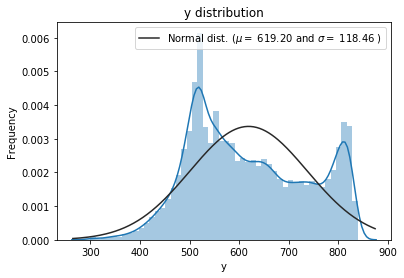

In [6]:
sns.distplot(di['y'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(di['y'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')


# Training 

In [8]:
model, X_test, y_test = train_model.train(dn,'data/processed')

Selected values:  ['x005' 'x006' 'x014' 'x031' 'x036' 'x043' 'x044' 'x055' 'x056' 'x075'
 'x076' 'x099' 'x181' 'x233' 'x234' 'x236' 'x243' 'x272' 'x274' 'x276'
 'x281']


# Distribution of selected features


 mu = 0.18 and sigma = 0.11 and median = 0.18


 mu = 0.21 and sigma = 0.32 and median = 0.00


 mu = 0.05 and sigma = 0.06 and median = 0.03


 mu = 0.02 and sigma = 0.03 and median = 0.01


 mu = 0.06 and sigma = 0.06 and median = 0.04


 mu = 0.01 and sigma = 0.01 and median = 0.01


 mu = 0.00 and sigma = 0.01 and median = 0.00


 mu = 0.01 and sigma = 0.03 and median = 0.00


 mu = 0.01 and sigma = 0.03 and median = 0.00


 mu = 0.00 and sigma = 0.01 and median = 0.00


 mu = 0.01 and sigma = 0.02 and median = 0.00


 mu = 0.02 and sigma = 0.04 and median = 0.00


 mu = 0.01 and sigma = 0.01 and median = 0.00


 mu = 0.00 and sigma = 0.01 and median = 0.00


 mu = 0.15 and sigma = 0.05 and median = 0.13


 mu = 0.00 and sigma = 0.01 and median = 0.00


 mu = 0.00 and sigma = 0.00 and median = 0.00


 mu = 0.00 and sigma = 0.01 and median = 0.00


 mu = 0.01 and sigma = 0.02 and median = 0.00


 mu = 0.00 and sigma = 0.01 and median = 0.00



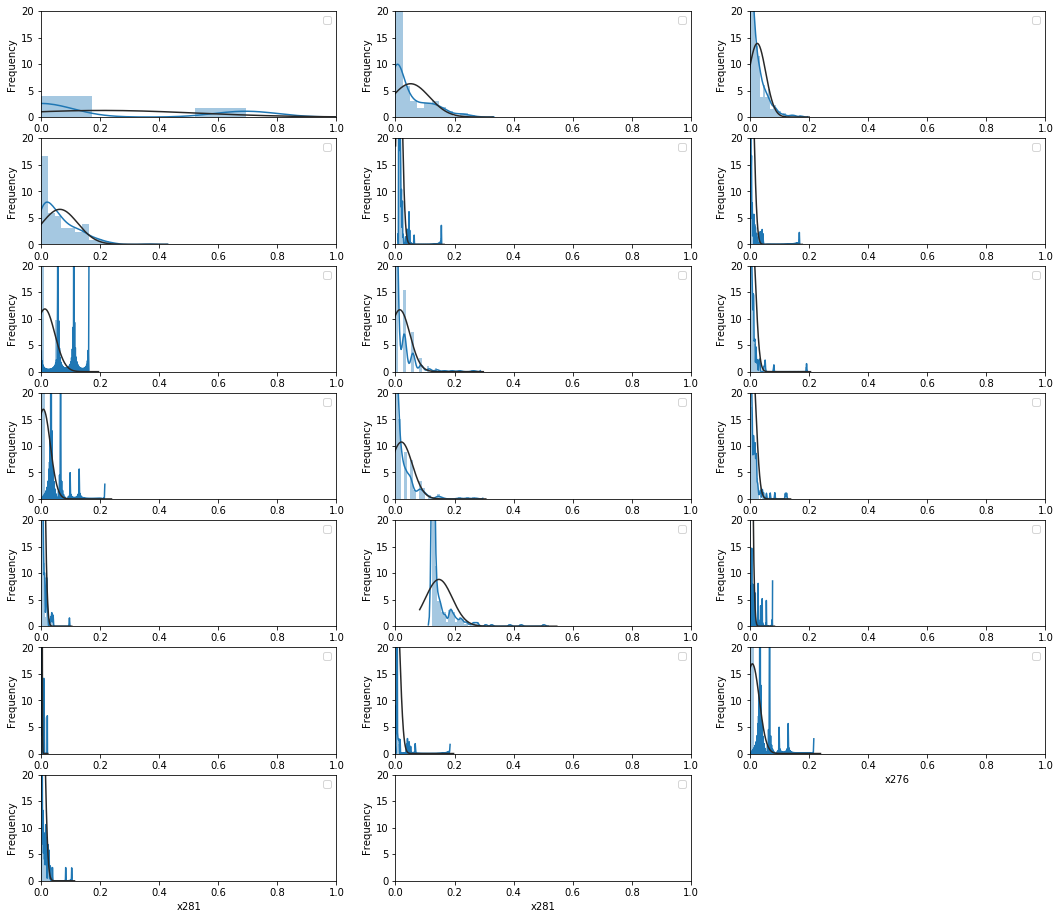

In [174]:

a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(18, 16))
for col in X_test.columns:
    x_plot = x[col]
    
    sns.distplot(x_plot , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(x_plot)
    print( '\n mu = {:.2f} and sigma = {:.2f} and median = {:.2f}\n'.format(mu, sigma,x_plot.median()))

    #Now plot the distribution
    plt.subplot(a, b, c)
    plt.title('Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} and median= {:.2f} )'.format(mu, sigma,x_plot.median()))
    plt.ylabel('Frequency')
    #plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
    plt.xlabel(col)
    plt.xlim(0,1)
    plt.ylim(0,20)
    c = c + 1

plt.show()

# Prediction

Mean absolute error : 0.030575354968535504
RMSE : 0.043046571735793605


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

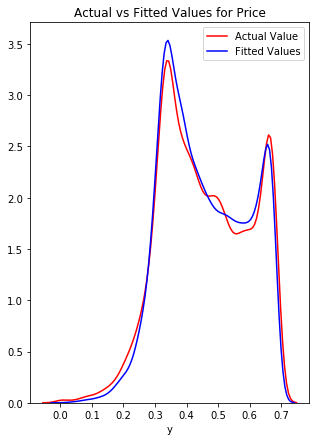

In [181]:
predict_model.predict(model,X_test,y_test)